In [15]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pandas as pd

In [35]:
# Загрузка датасета
digits = datasets.load_digits()

In [36]:
df = pd.DataFrame(digits.data, columns=digits.feature_names)
df['target'] = digits.target

In [37]:
print(digits.data.shape)

(1797, 64)


In [38]:
# Разделение на обучающий и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [57]:
# Создание модели SVM
svm_model = SVC(kernel='rbf', C=1.0, random_state=123)

# Обучение модели на обучающем наборе данных
svm_model.fit(X_train, y_train)

SVC(random_state=123)

In [58]:
# Предсказание на тестовом наборе данных
y_pred = svm_model.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9888888888888889


In [59]:
# Создание модели SVM
svm_model_01 = SVC(kernel='rbf', C=0.1, random_state=123)

# Обучение модели на обучающем наборе данных
svm_model_01.fit(X_train, y_train)

# Предсказание на тестовом наборе данных
y_pred = svm_model_01.predict(X_test)

# Оценка качества модели
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

0.9527777777777777


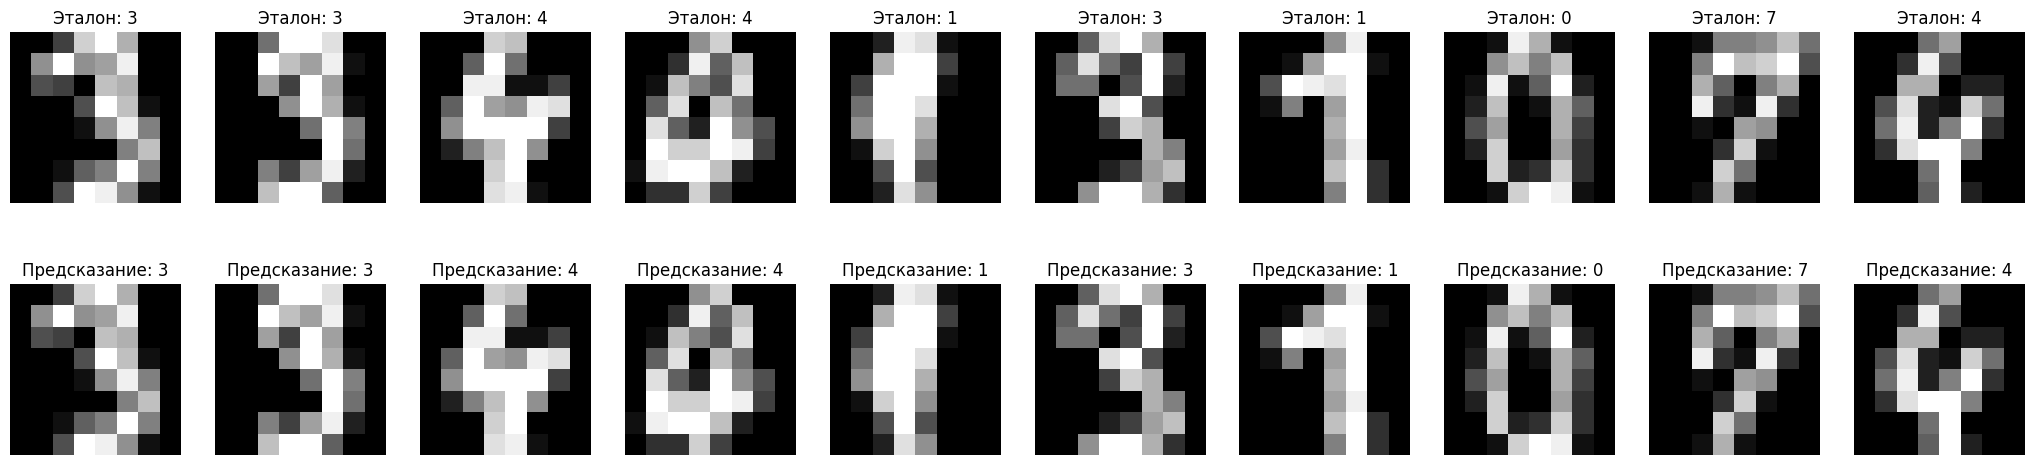

In [60]:
import matplotlib.pyplot as plt

# Выбираем несколько случайных примеров из тестового набора данных для визуализации
n_samples = 10
sample_images = X_test[:n_samples]
sample_targets = y_test[:n_samples]
predicted_targets = y_pred[:n_samples]


plt.figure(figsize=(26, 6))
for i in range(n_samples):
    plt.subplot(2, n_samples, i + 1)
    plt.imshow(sample_images[i].reshape((8, 8)), cmap=plt.cm.gray)
    plt.title(f'Эталон: {sample_targets[i]}')
    plt.axis('off')
    
    plt.subplot(2, n_samples, n_samples + i + 1)
    plt.imshow(sample_images[i].reshape((8, 8)), cmap=plt.cm.gray)
    plt.title(f'Предсказание: {predicted_targets[i]}')
    plt.axis('off')

plt.show()